In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# upload final result data
df = pd.read_csv("final_result_updated.csv")

# show the structure of the dataset
print(df.head())

                          Area       Task Fallback_Name  \
0              Computer Vision  Retrieval     Retrieval   
1  Natural Language Processing  Retrieval     Retrieval   
2                  Methodology  Retrieval     Retrieval   
3              Computer Vision  Retrieval     Retrieval   
4  Natural Language Processing  Retrieval     Retrieval   

                                           Benchmark          Model  \
0  https://paperswithcode.com/sota/retrieval-on-q...          BM25S   
1  https://paperswithcode.com/sota/retrieval-on-q...          BM25S   
2  https://paperswithcode.com/sota/retrieval-on-q...          BM25S   
3  https://paperswithcode.com/sota/retrieval-on-q...  Elasticsearch   
4  https://paperswithcode.com/sota/retrieval-on-q...  Elasticsearch   

                                               Paper Publication  \
0  BM25S: Orders of magnitude faster lexical sear...  2024-07-04   
1  BM25S: Orders of magnitude faster lexical sear...  2024-07-04   
2  BM25S: Orde

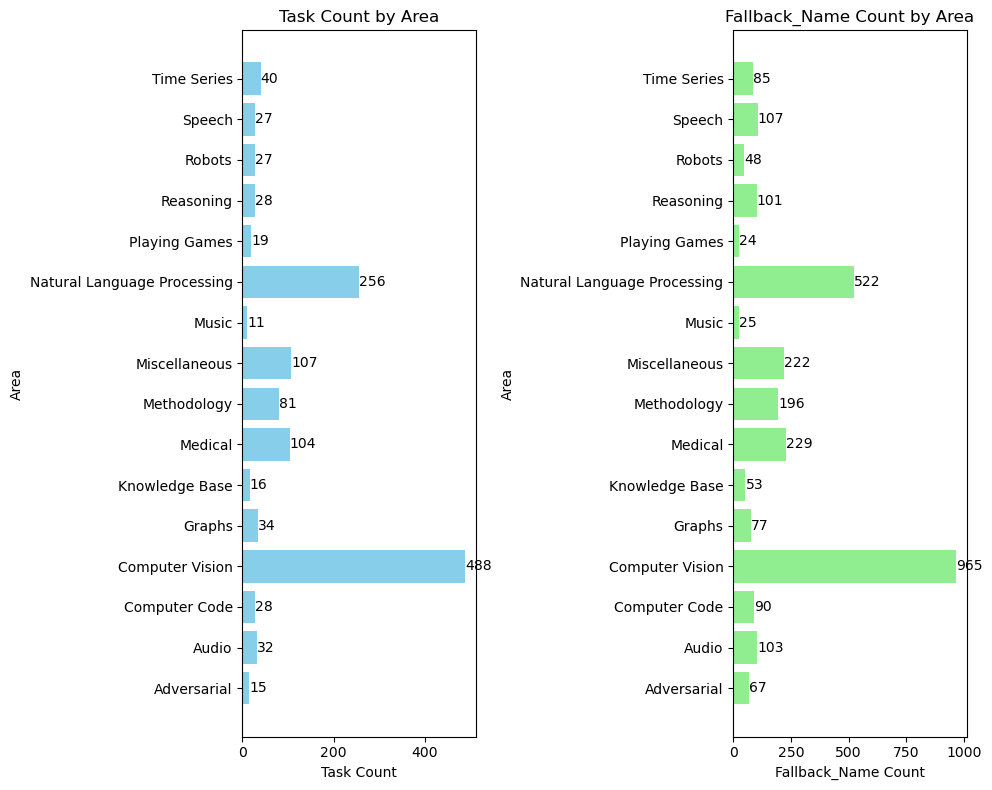

In [6]:
# Analysis Area

# Group by 'Area' and get the counts for 'Task' and 'Fallback_Name'
grouped_task = df.groupby('Area')['Task'].nunique()
grouped_fallback = df.groupby('Area')['Fallback_Name'].nunique()

# Plot histograms for 'Task' and 'Fallback_Name' rotated 90 degrees
plt.figure(figsize=(10, 8))

# Histogram for Task counts
plt.subplot(1, 2, 1)
bars = plt.barh(grouped_task.index, grouped_task.values, color='skyblue')
plt.xlabel('Task Count')
plt.ylabel('Area')
plt.title('Task Count by Area')

# Add count labels at the top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

# Histogram for Fallback_Name counts
plt.subplot(1, 2, 2)
bars = plt.barh(grouped_fallback.index, grouped_fallback.values, color='lightgreen')
plt.xlabel('Fallback_Name Count')
plt.ylabel('Area')
plt.title('Fallback_Name Count by Area')

# Add count labels at the top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

plt.tight_layout()
# plt.savefig('Task_and_benchmarks')  # save image
plt.show()

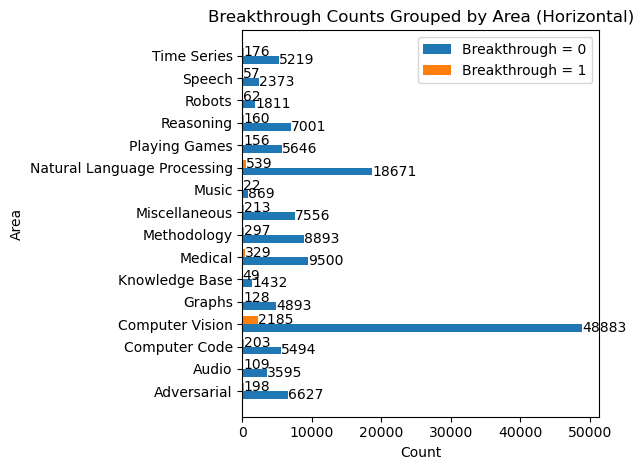

In [7]:
# Count the number of Breakthroughs (0 and 1) per Area
breakthrough_counts = df.groupby('Area')['Breakthrough'].value_counts().unstack(fill_value=0)

# Plotting the horizontal bar chart
fig, ax = plt.subplots()
bar_height = 0.35
areas = breakthrough_counts.index
y = range(len(areas))

# Plot bars for Breakthrough = 0 and Breakthrough = 1
bar1 = ax.barh(y, breakthrough_counts[0], bar_height, label='Breakthrough = 0')
bar2 = ax.barh([i + bar_height for i in y], breakthrough_counts[1], bar_height, label='Breakthrough = 1')

# Adding the counts on top of each bar
for bar in bar1:
    xval = bar.get_width()
    ax.text(xval + 0.5, bar.get_y() + bar.get_height() / 2, int(xval), ha='left', va='center')

for bar in bar2:
    xval = bar.get_width()
    ax.text(xval + 0.5, bar.get_y() + bar.get_height() / 2, int(xval), ha='left', va='center')

# Labels and title
ax.set_ylabel('Area')
ax.set_xlabel('Count')
ax.set_title('Breakthrough Counts Grouped by Area (Horizontal)')
ax.set_yticks([i + bar_height / 2 for i in y])
ax.set_yticklabels(areas, rotation=0)
ax.legend()

plt.tight_layout()
# plt.savefig("breakthrough.png")        # save image
plt.show()

In [9]:
# Show the breakthrough ratio
# Calculate the ratio of Breakthrough (1) to Non-Breakthrough (0)
breakthrough_counts['Ratio'] = breakthrough_counts[1] / (breakthrough_counts[0] + breakthrough_counts[1])

# Sort the areas by the ratio in descending order
breakthrough_counts_sorted = breakthrough_counts.sort_values(by='Ratio', ascending=False)

# Display the sorted breakthrough counts with ratios
print(breakthrough_counts_sorted)

Breakthrough                     0     1     Ratio
Area                                              
Computer Vision              48883  2185  0.042786
Computer Code                 5494   203  0.035633
Medical                       9500   329  0.033472
Robots                        1811    62  0.033102
Knowledge Base                1432    49  0.033086
Time Series                   5219   176  0.032623
Methodology                   8893   297  0.032318
Audio                         3595   109  0.029428
Adversarial                   6627   198  0.029011
Natural Language Processing  18671   539  0.028058
Miscellaneous                 7556   213  0.027417
Playing Games                 5646   156  0.026887
Graphs                        4893   128  0.025493
Music                          869    22  0.024691
Speech                        2373    57  0.023457
Reasoning                     7001   160  0.022343


In [11]:
# Analysis task

# Group by 'Fallback_name' and count the number of occurrences
grouped_df = df.groupby('Fallback_Name').size().reset_index(name='Count')

# Sort the result from high to low
grouped_df = grouped_df.sort_values(by='Count', ascending=False)

# Display the result
print(grouped_df.head(50))

                                  Fallback_Name  Count
613                        Graph Classification   7704
1356                      Semantic Segmentation   5253
702                        Image Classification   5212
153                                 Atari Games   5024
1227                         Question Answering   4353
1547                        Text Classification   3444
89                           Action Recognition   3075
129                           Anomaly Detection   2212
1343       Self-Supervised Image Classification   2200
546              Few-Shot Semantic Segmentation   2160
160                        Audio Classification   2052
711                            Image Generation   1989
1567                   Text-to-Image Generation   1904
1048                           Object Detection   1870
541               Few-Shot Image Classification   1800
35                          3D Object Detection   1550
1741            Visual Question Answering (VQA)   1390
869       

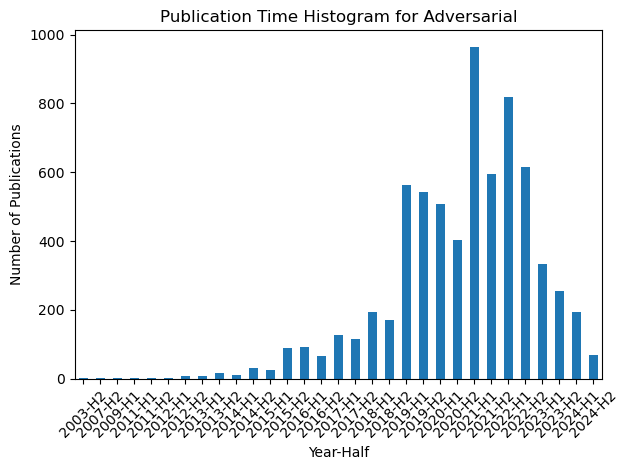

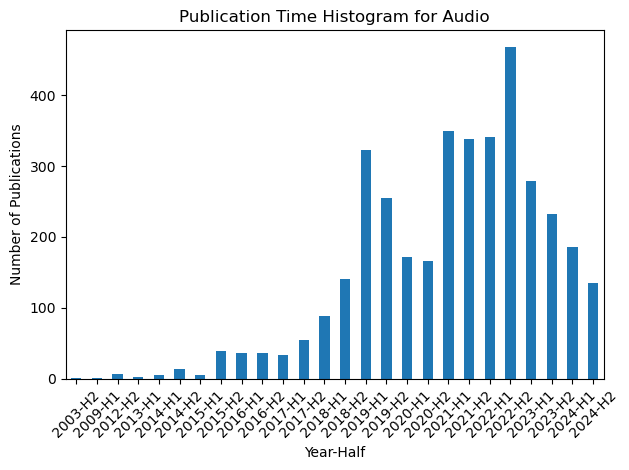

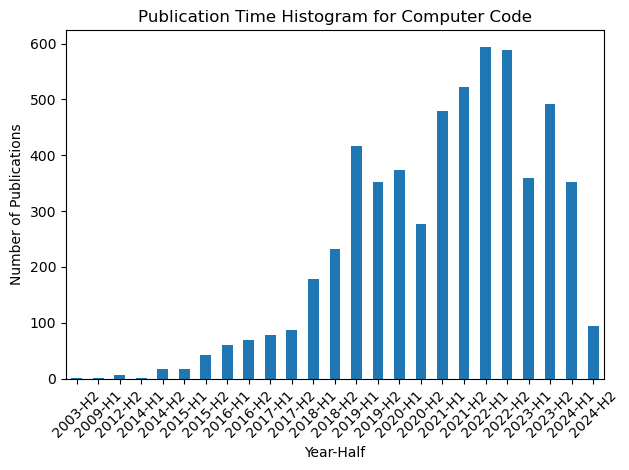

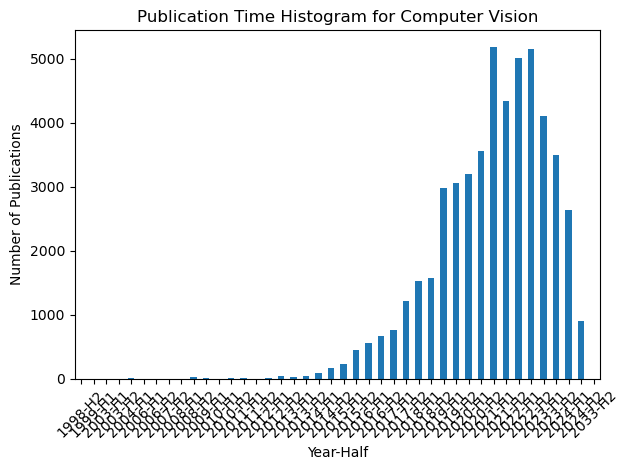

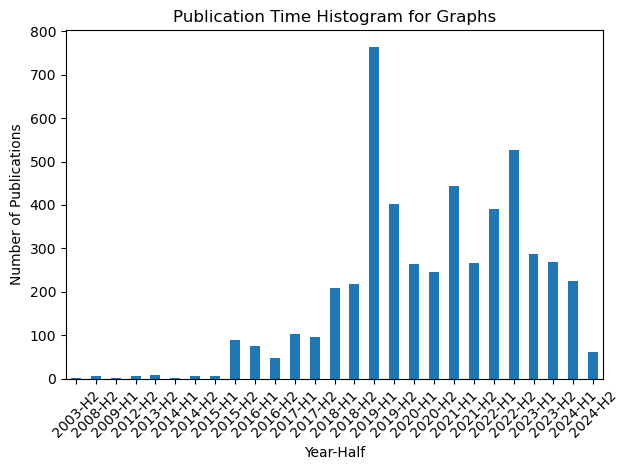

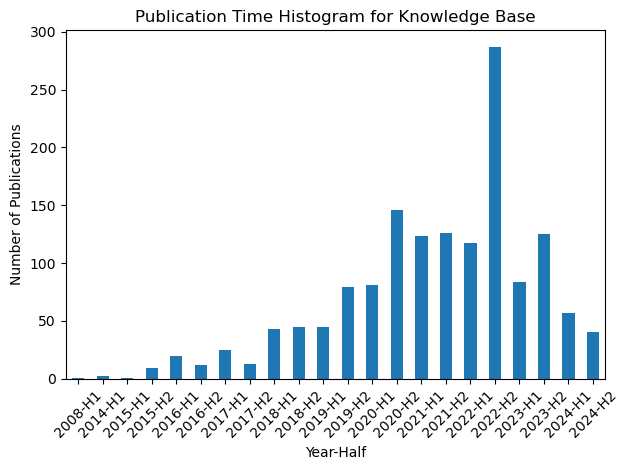

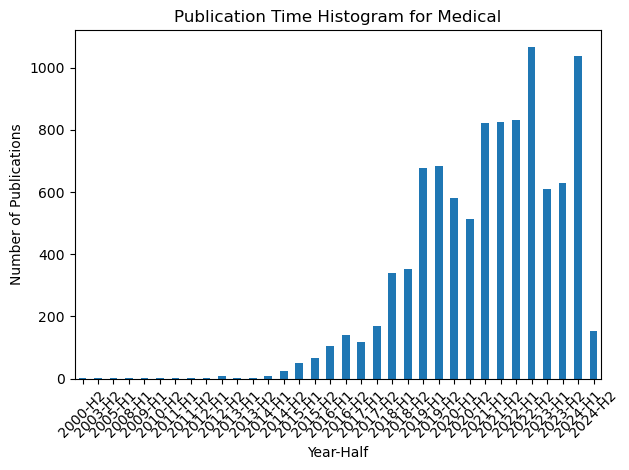

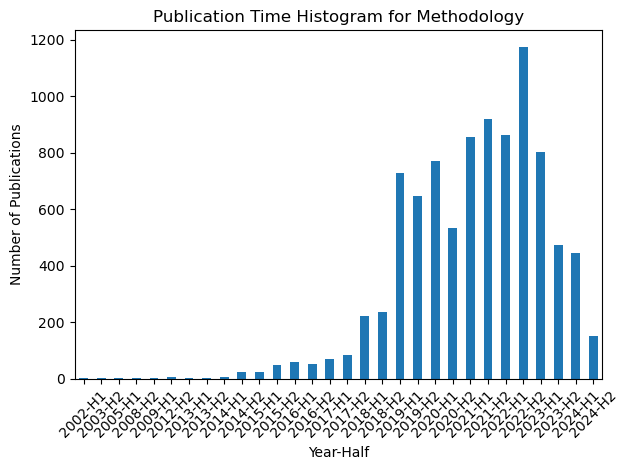

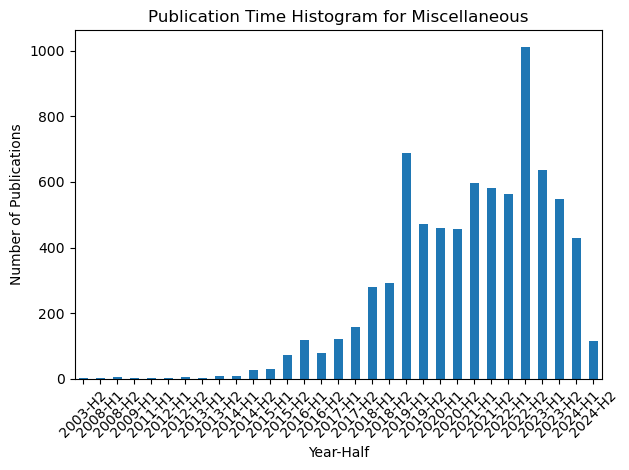

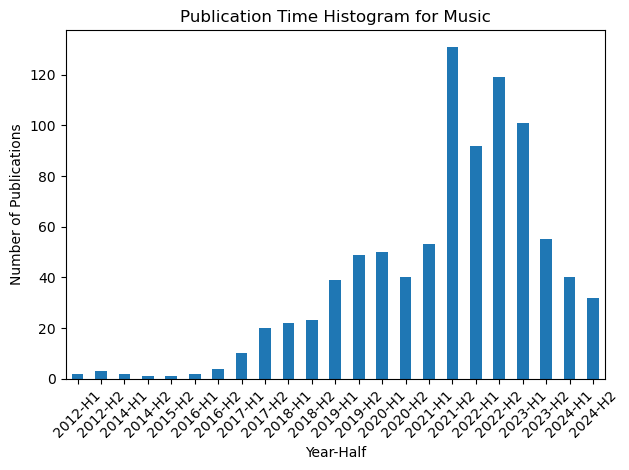

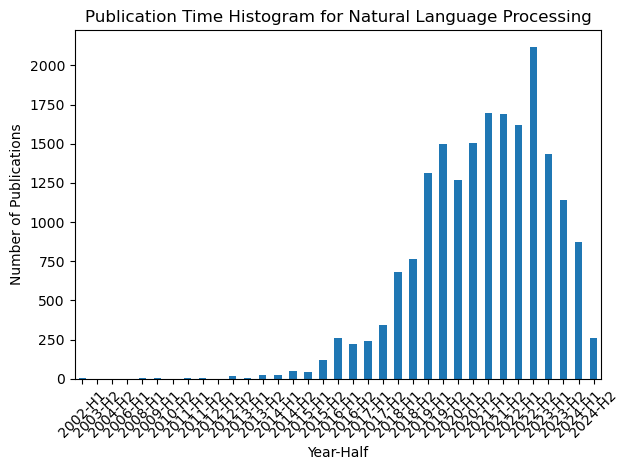

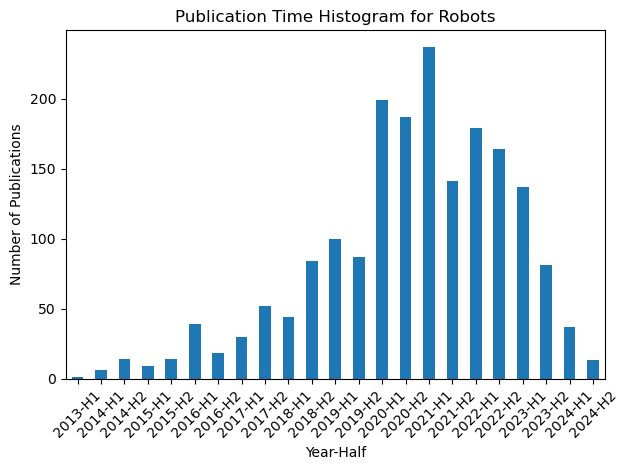

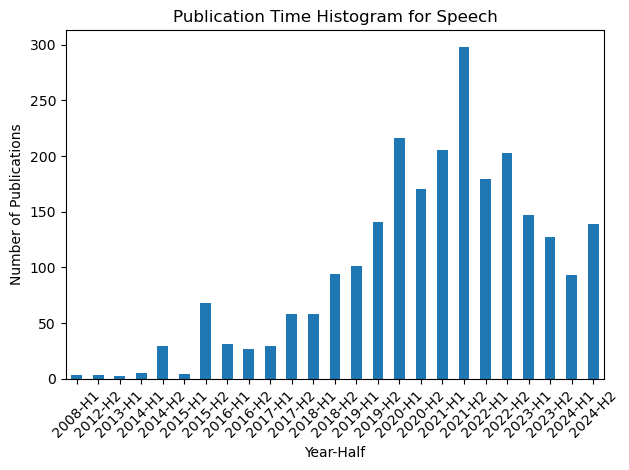

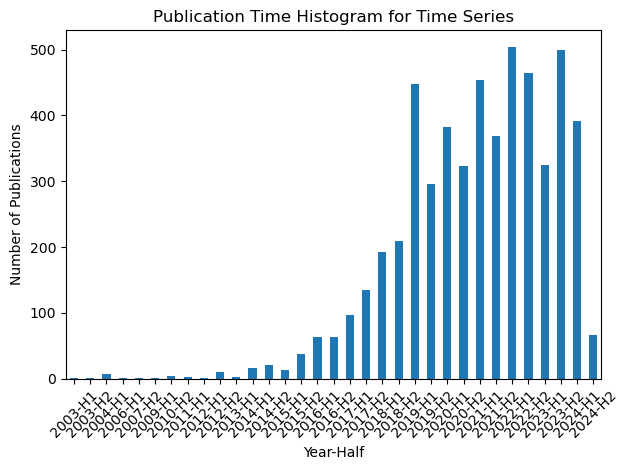

In [24]:
# Show the publication time distribution
# Convert the 'Paper Publication' column to datetime format
df["Publication"] = pd.to_datetime(df['Publication'], errors='coerce')

# Extract the year and half-year (H1 or H2) from the publication date
df['Year-Half'] = df['Publication'].dt.year.astype(str) + '-H' + ((df['Publication'].dt.month > 6).astype(int) + 1).astype(str)

# Group by Area and Year-Half, then plot histograms for each group
import matplotlib.pyplot as plt

# Group the data by Area and Year-Half and plot
for area, group in df.groupby('Area'):
    plt.figure()
    group['Year-Half'].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Publication Time Histogram for {area}")
    plt.xlabel("Year-Half")
    plt.ylabel("Number of Publications")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.savefig(f"{area}_publication_histogram.png")        # save images
    plt.show()

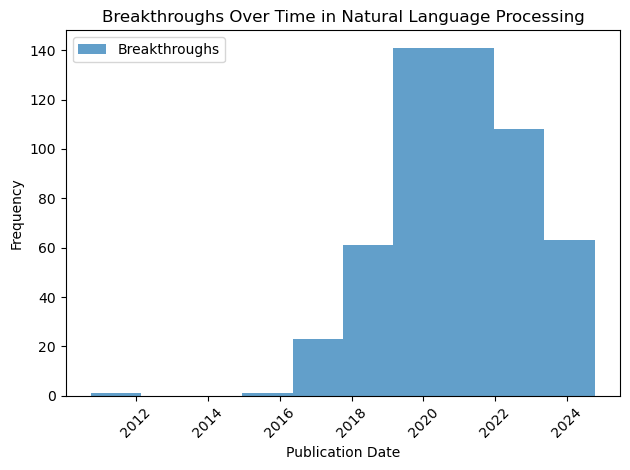

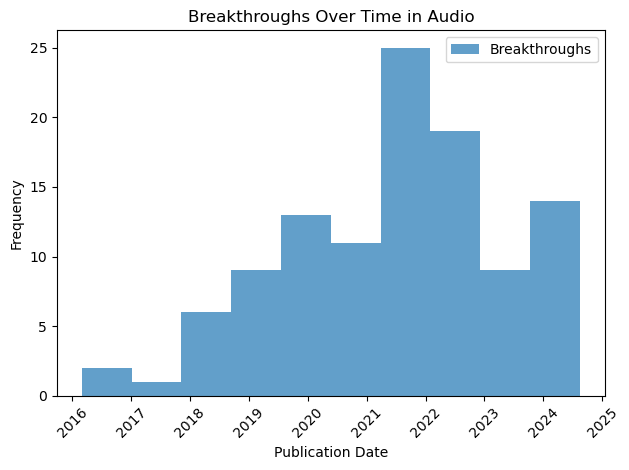

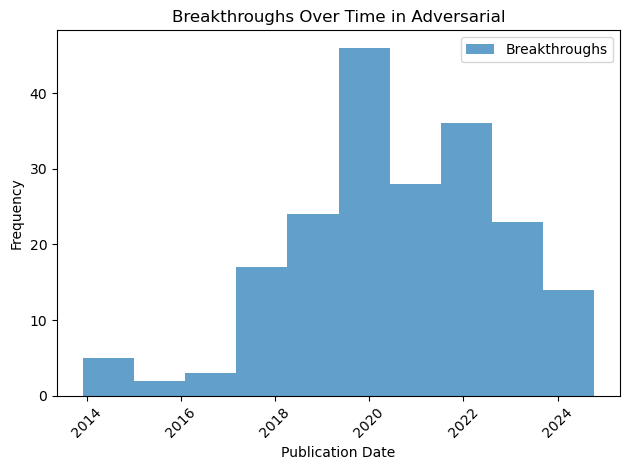

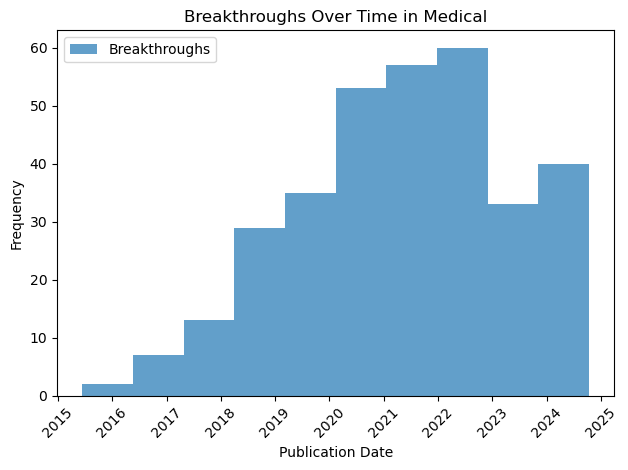

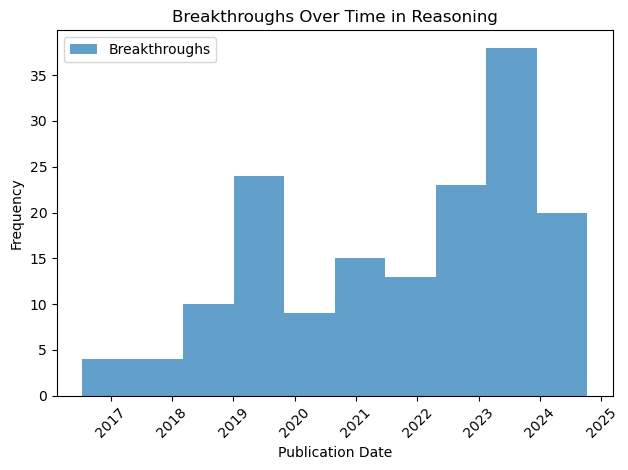

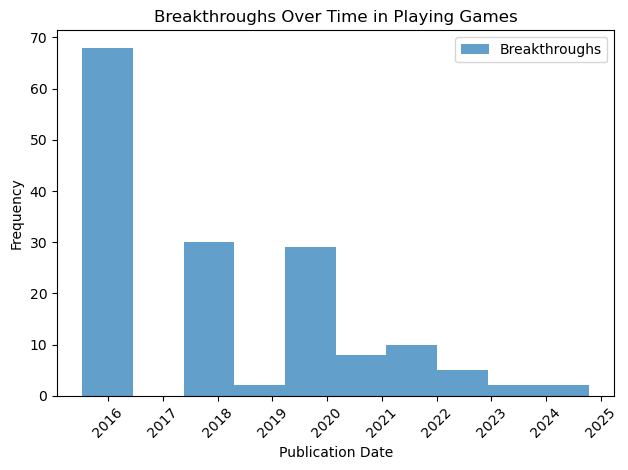

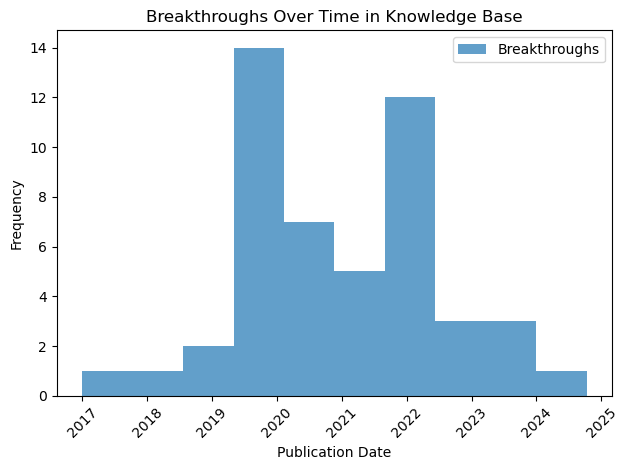

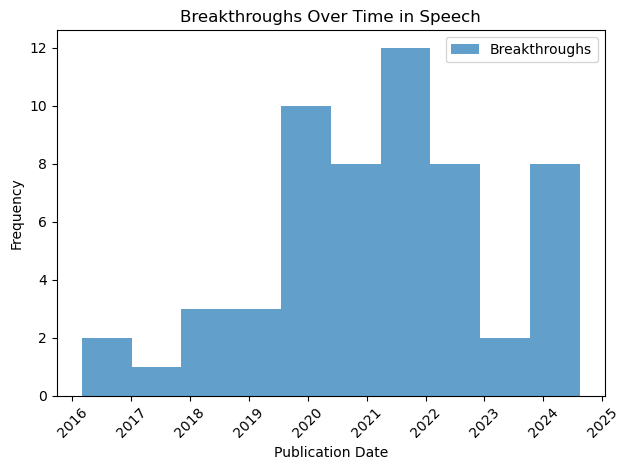

In [8]:
# Time Series Dimension
# Convert "Publication" column to datetime if it's not already
df['Publication'] = pd.to_datetime(df['Publication'], errors='coerce')

# Group by 'Area' and create histogram plots for 'Breakthrough' in each 'Area'
areas = df['Area'].unique()
figures = []

for area in areas:
    area_data = df[df['Area'] == area]
    plt.figure()
    plt.hist(area_data[area_data['Breakthrough'] == 1]['Publication'], bins=10, label='Breakthroughs', alpha=0.7)
    # plt.hist(area_data[area_data['Breakthrough'] == 0]['Publication'], bins=10, label='Non-Breakthroughs', alpha=0.5)
    plt.title(f'Breakthroughs Over Time in {area}')
    plt.xlabel('Publication Date')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

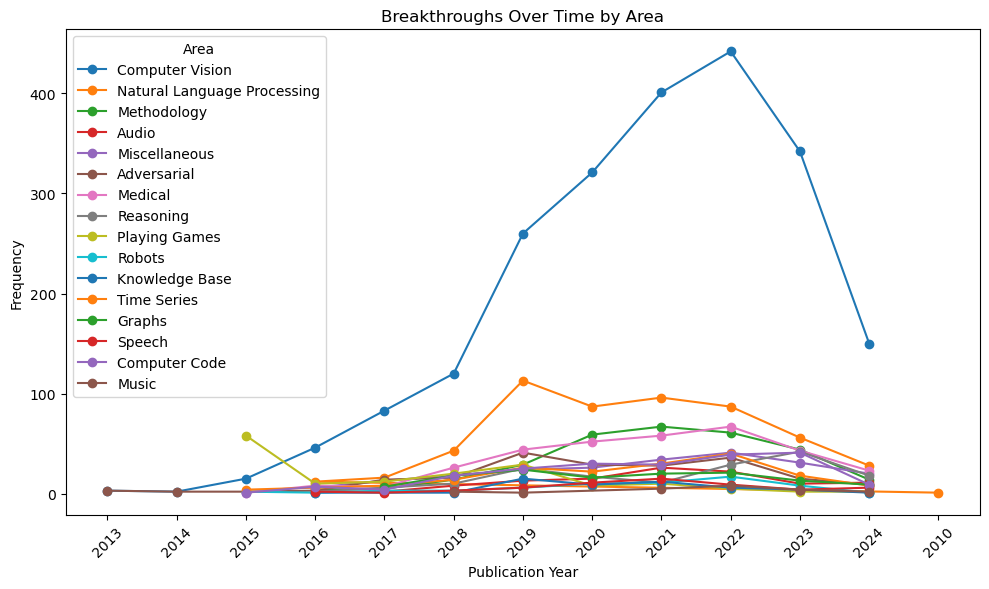

In [8]:
# Time Series Dimension
# Convert "Publication" column to datetime if it's not already
df['Publication'] = pd.to_datetime(df['Publication'], errors='coerce')

# Group by 'Area' and plot all trends in one figure
plt.figure(figsize=(10, 6))  # Set figure size for better visibility

for area in df['Area'].unique():
    area_data = df[df['Area'] == area]
    # Filter breakthroughs
    breakthrough_data = area_data[area_data['Breakthrough'] == 1]
    # Count breakthroughs by publication year
    breakthrough_trends = breakthrough_data['Publication'].dt.to_period('Y').value_counts().sort_index()
    
    # Plot each area's breakthroughs trend
    plt.plot(
        breakthrough_trends.index.astype(str),
        breakthrough_trends.values,
        marker='o',
        label=area
    )

# Add labels, legend, and title
plt.title('Breakthroughs Over Time by Area')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.tight_layout()
plt.show()

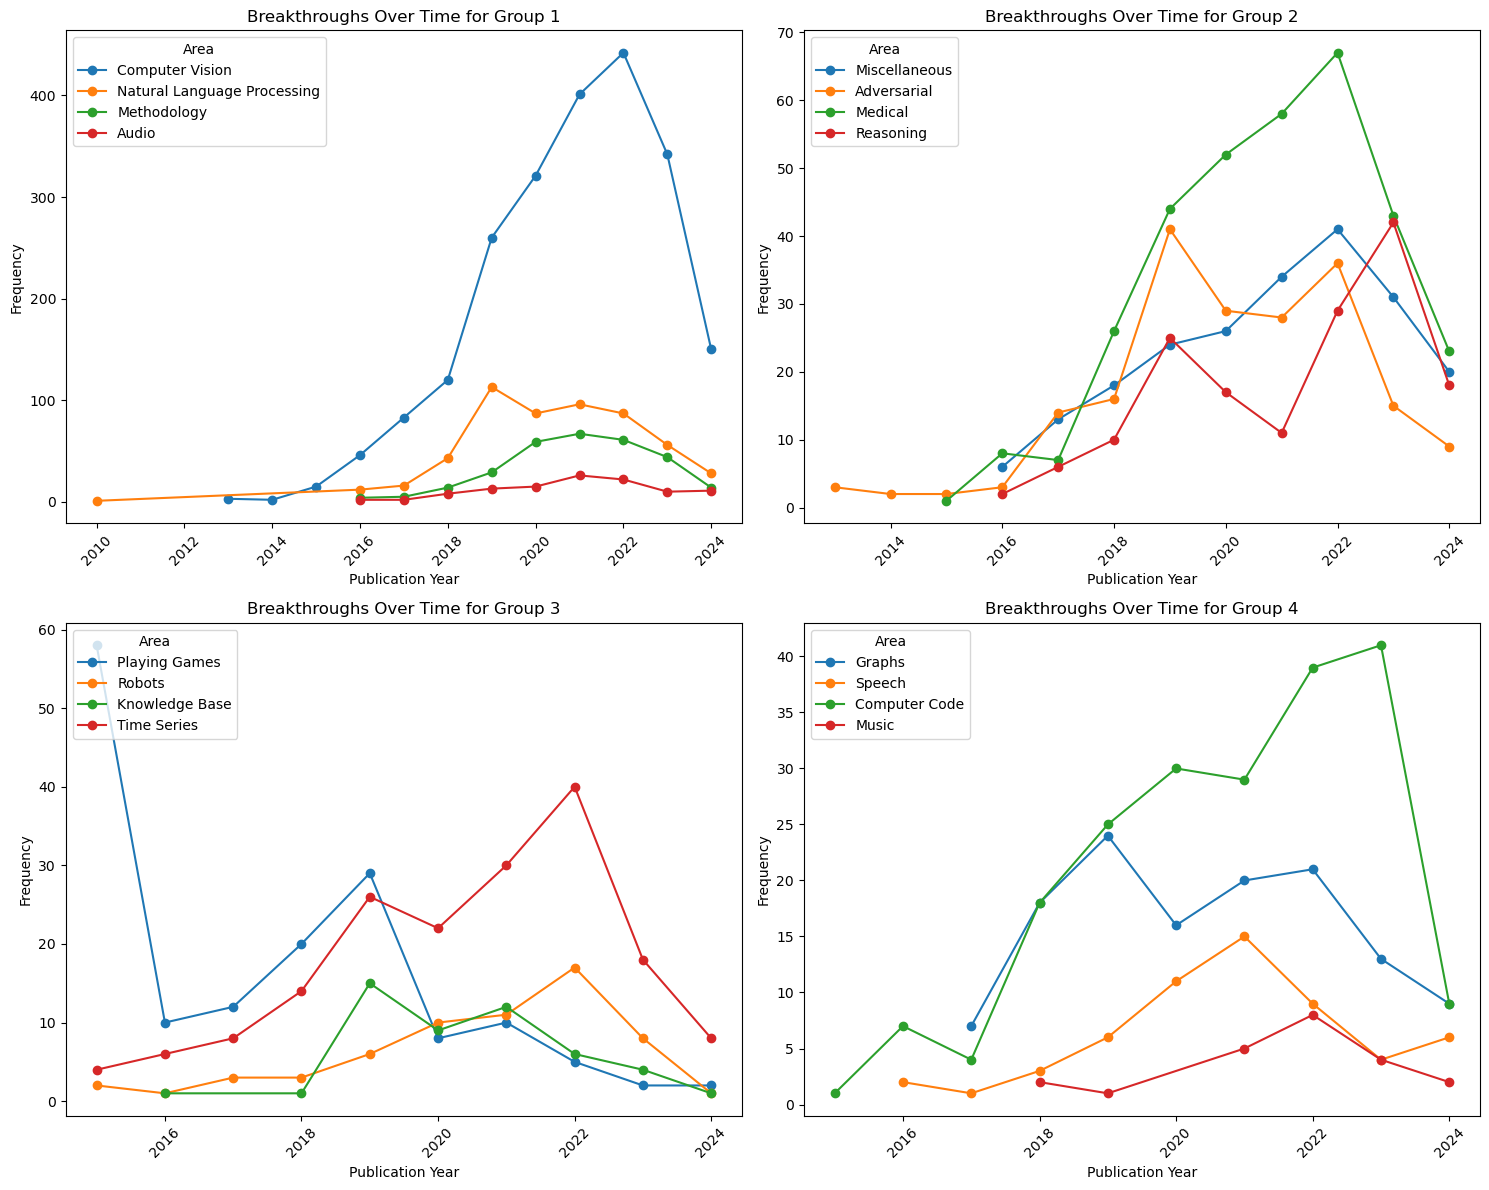

In [14]:
# Set up the figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid for 4 groups

# Loop through each group and corresponding subplot
for i, (group, ax) in enumerate(zip(area_groups, axs.flatten())):
    for area in group:
        area_data = df[df['Area'] == area].sort_values(by="Publication")  # Sort by publication date
        # Filter breakthroughs
        breakthrough_data = area_data[area_data['Breakthrough'] == 1]
        # Count breakthroughs by publication year
        breakthrough_trends = breakthrough_data['Publication'].dt.to_period('Y').value_counts().sort_index()
        
        # Sort index as integer years for proper ordering
        years = breakthrough_trends.index.astype(str).astype(int)  # Convert to integer for numeric sorting
        
        # Plot each area's breakthroughs trend
        ax.plot(
            years,
            breakthrough_trends.values,
            marker='o',
            label=area
        )
    
    # Set labels and title for each subplot
    ax.set_title(f"Breakthroughs Over Time for Group {i+1}")
    ax.set_xlabel('Publication Year')
    ax.set_ylabel('Frequency')
    ax.legend(title='Area', loc="upper left")
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
# Load the dataset
merge = pd.read_csv("tasks_with_benchmarks_clean.csv")

# Select the three columns
selected_columns = merge[["Area", "Task", "Fallback_Name"]]

# Drop duplicates based on Task and Fallback_Name
unique_combinations = selected_columns.drop_duplicates(subset=["Task", "Fallback_Name"])

# Save the result to a new CSV file
unique_combinations.to_csv("unique_task_fallback_with_area.csv", index=False)

In [4]:
# read the merge map
unique = pd.read_csv('unique_task_fallback_with_area.csv')
print(unique.head())

          Area                    Task                 Fallback_Name  \
0  Adversarial  Adversarial Robustness        Adversarial Robustness   
1  Adversarial     Adversarial Defense           Adversarial Defense   
2  Adversarial     Adversarial Defense      Adversarial Purification   
3  Adversarial     Adversarial Defense  Provable Adversarial Defense   
4  Adversarial          Data Poisoning                Data Poisoning   

                                               Merge  
0  AI applications and techniques: Measuring and ...  
1  AI applications and techniques: Measuring and ...  
2  AI applications and techniques: Measuring and ...  
3  AI applications and techniques: Measuring and ...  
4  AI applications and techniques: Measuring and ...  


Merge
AI applications and techniques: Computer vision             1966
AI applications and techniques: Language processing          794
AI applications and techniques: Analytics and algorithms     533
AI applications and techniques: Speech processing            143
AI applications and techniques: Measuring and testing        130
AI applications and techniques: Knowledge representation     120
AI applications and techniques: Distributed AI                49
AI applications and techniques: Robotics                      31
AI applications and techniques: Planning and scheduling       30
AI applications and techniques: Control                       28
Name: count, dtype: int64


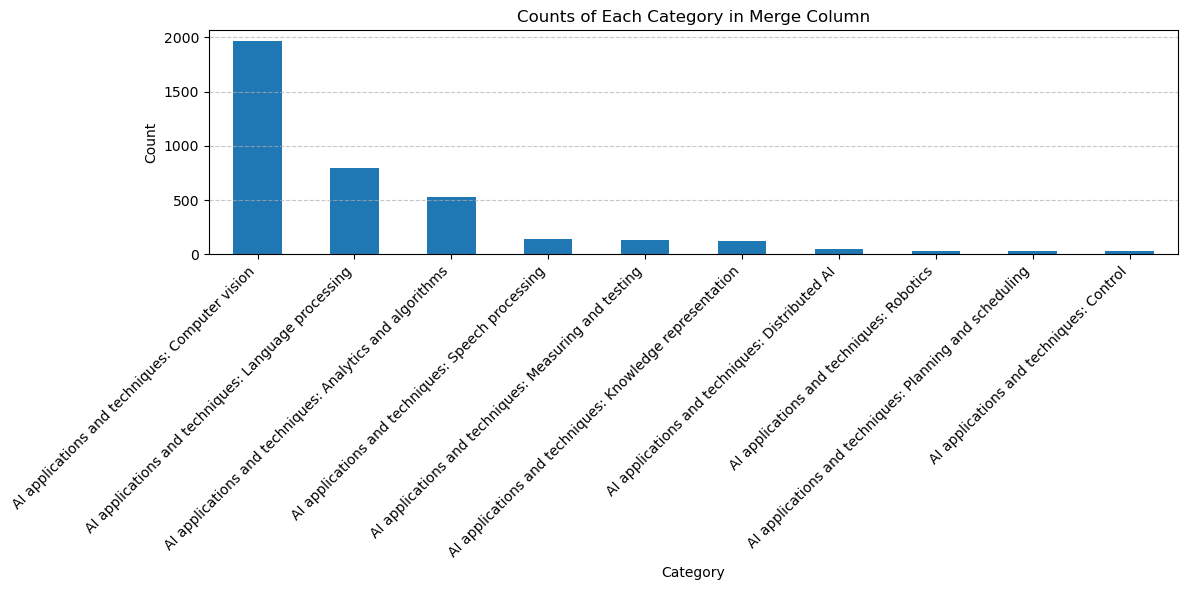

In [8]:
# show the distribution of AI applications
# Group by the 'Merge' column and count occurrences of each category
merge_counts = unique['Merge'].value_counts()

# Display the counts
print(merge_counts)

# Plot the counts as a bar chart
plt.figure(figsize=(12, 6))
merge_counts.plot(kind='bar')
plt.title('Counts of Each Category in Merge Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()